**EchoWater-AI Based Water Pollution Detection(week 1)**

PROBLEM STATEMENT

Water pollution threatens ecosystems and human health; this project uses AI to automatically detect and classify polluted water for faster and more reliable monitoring

STEP 1:Import libraries

In [6]:
import os
import zipfile
from google.colab import files



STEP 2:Load Dataset

In [9]:
from google.colab import files
files.upload()  # Upload kaggle.json file here



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fathimathrafana","key":"65eec6efbd1a4a2fefa353acfd22c2ff"}'}

In [26]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/



In [11]:
!pip install kaggle


In [20]:
!kaggle datasets download -d elvinagammed/clean-dirty-water-dataset



Dataset URL: https://www.kaggle.com/datasets/elvinagammed/clean-dirty-water-dataset
License(s): other
  0% 0.00/870k [00:00<?, ?B/s]
100% 870k/870k [00:00<00:00, 872MB/s]


In [21]:
import zipfile

with zipfile.ZipFile("clean-dirty-water-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("✅ Dataset extracted successfully!")



✅ Dataset extracted successfully!


In [28]:
train_path = "dataset/water images/train"

for folder in os.listdir(train_path):
    count = len(os.listdir(os.path.join(train_path, folder)))
    print(folder, ":", count, "images")

Clean-samples : 31 images
Dirty-samples : 16 images


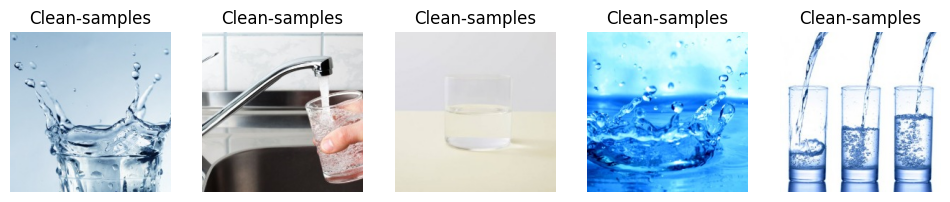

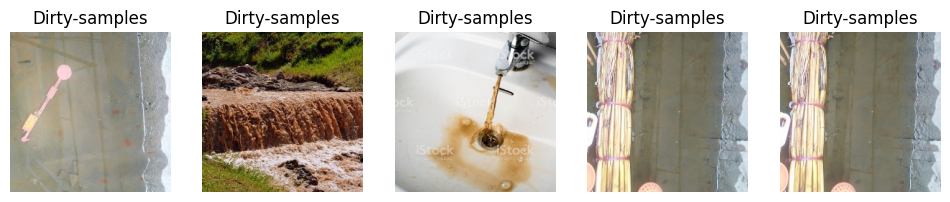

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display 5 sample images from each class
classes = ["Clean-samples", "Dirty-samples"]

for cls in classes:
    folder_path = os.path.join(train_path, cls)
    sample_images = os.listdir(folder_path)[:5]

    plt.figure(figsize=(12, 3))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(folder_path, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(cls)
    plt.show()

STEP 3:Explore Dataset

Before training any model, we need to understand the dataset.
We will:

.Check total number of images
.See distribution of classes
.Look for missing values
.View a random sample image

In [32]:
from PIL import Image

# 1. Check number of classes
classes = os.listdir(train_path)
print("Classes:", classes)

# 2. Count images in each class
for cls in classes:
    folder_path = os.path.join(train_path, cls)
    print(f"{cls}: {len(os.listdir(folder_path))} images")

# 3. Check image shapes (take first image from each class)
for cls in classes:
    folder_path = os.path.join(train_path, cls)
    sample_img = os.listdir(folder_path)[0]
    img_path = os.path.join(folder_path, sample_img)
    img = Image.open(img_path)
    print(f"{cls} sample image shape: {img.size}, mode: {img.mode}")

# 4. Check for corrupted images
corrupted = 0
for cls in classes:
    folder_path = os.path.join(train_path, cls)
    for img_name in os.listdir(folder_path):
        try:
            img = Image.open(os.path.join(folder_path, img_name))
            img.verify()
        except:
            corrupted += 1

print("Number of corrupted images:", corrupted)


Classes: ['Clean-samples', 'Dirty-samples']
Clean-samples: 31 images
Dirty-samples: 16 images
Clean-samples sample image shape: (224, 224), mode: RGB
Dirty-samples sample image shape: (224, 224), mode: RGB
Number of corrupted images: 0
